In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [86]:
df=pd.read_csv('Mall_Customers.csv')

In [87]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
x=df.iloc[:,3:].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [89]:
import scipy.cluster.hierarchy as sch

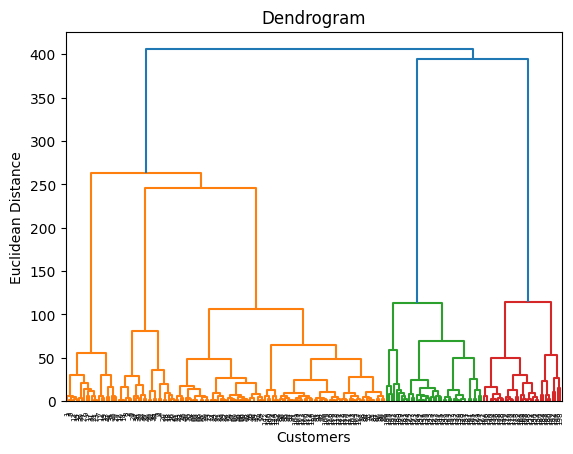

In [90]:
#Using the dendrogram to find the optimal number of clusters
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [91]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='average'
)
y_hc=hc.fit_predict(x)

In [92]:
y_hc

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4,
       0, 4])

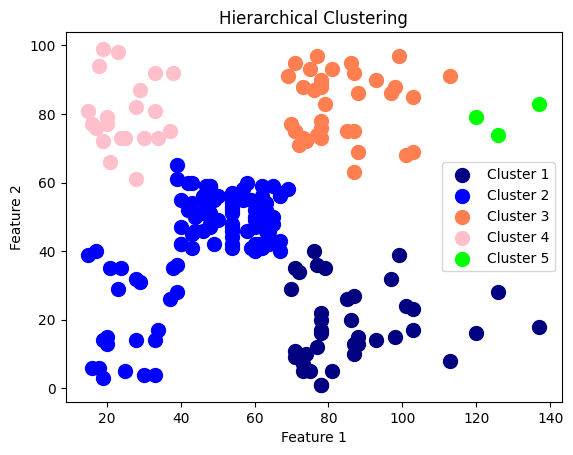

In [93]:
import matplotlib.pyplot as plt
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='navy', label='Cluster 1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1], s=100, c='coral', label='Cluster 3')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1], s=100, c='pink', label='Cluster 4')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1], s=100, c='lime', label='Cluster 5')

plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [94]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,y_hc)
print("Silhouette Score for Hierarchical Clustering",score)

Silhouette Score for Hierarchical Clustering 0.4791911539647448


In [95]:
df1=pd.read_csv('all-data.csv',encoding='latin1',header=None)

In [96]:
df1.head()

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [97]:
df1.columns=['sentiment','news']

In [98]:
df1.sum().isnull()



sentiment    False
news         False
dtype: bool

In [99]:
df1.columns

Index(['sentiment', 'news'], dtype='object')

In [100]:
text_data=df1['news']

In [101]:
#Use TF-IDF to convert test data to numerical
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_features=1000,      
    stop_words='english'    
)
x = vectorizer.fit_transform(text_data)
print("Shape of TF-IDF matrix:", x.shape)


Shape of TF-IDF matrix: (4846, 1000)


In [102]:
#Convert to array by clustering
x_array = x.toarray()


In [103]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:20]) 

['00' '000' '01' '10' '100' '11' '12' '13' '14' '15' '150' '16' '17' '18'
 '19' '20' '200' '2004' '2005' '2006']


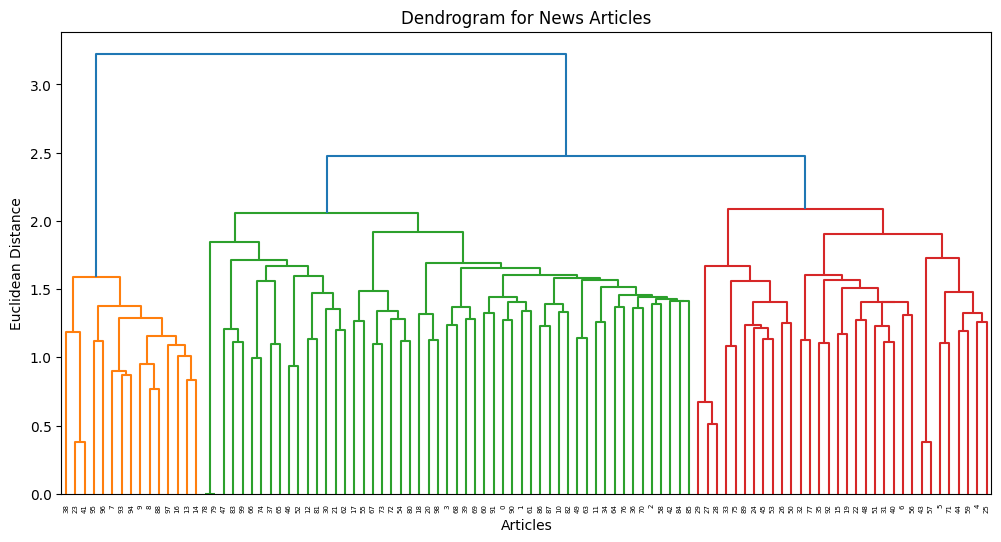

In [121]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

x_subset = x[:100].toarray()

plt.figure(figsize=(12,6))

dendrogram1 = sch.dendrogram(
    sch.linkage(x_subset, method='ward')
)

plt.axhline(y=180, color='red', linestyle='--', linewidth=2)
plt.title('Dendrogram for News Articles')
plt.xlabel('Articles')
plt.ylabel('Euclidean Distance')
plt.show()


In [122]:

from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(
    n_clusters=5,
    linkage='ward'
)
y_HC = HC.fit_predict(x_subset)

print(y_HC)

[0 0 0 0 2 2 2 3 3 3 0 0 1 3 3 2 3 0 0 2 0 1 2 3 4 2 4 4 4 4 1 2 2 4 0 2 0
 1 3 0 2 3 0 2 2 4 1 1 2 0 4 2 1 4 0 0 2 2 0 2 0 0 1 0 0 1 1 0 0 0 0 2 0 0
 1 4 0 2 1 1 0 1 0 1 0 0 0 0 3 4 0 0 2 3 3 3 3 3 0 1]


In [123]:
#Reduce TF-IDF to 2 Dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_subset)

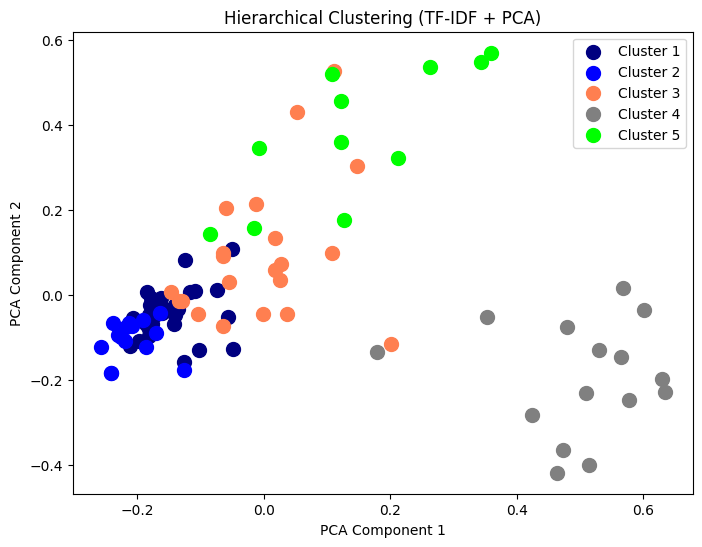

In [124]:
#Plot Clusters 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x_pca[y_HC==0,0], x_pca[y_HC==0,1], s=100, c='navy', label='Cluster 1')
plt.scatter(x_pca[y_HC==1,0], x_pca[y_HC==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(x_pca[y_HC==2,0], x_pca[y_HC==2,1], s=100, c='coral', label='Cluster 3')
plt.scatter(x_pca[y_HC==3,0], x_pca[y_HC==3,1], s=100, c='grey', label='Cluster 4')
plt.scatter(x_pca[y_HC==4,0], x_pca[y_HC==4,1], s=100, c='lime', label='Cluster 5')

plt.title("Hierarchical Clustering (TF-IDF + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.legend()
plt.show()

In [125]:
from sklearn.metrics import silhouette_score
score1 = silhouette_score(x_subset, y_HC)
print("Silhouette Score:", score1)


Silhouette Score: 0.04390214010779861
